# **PART A: Number of Neurons**

In [1]:
import tensorflow as tf
from keras import layers, models
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time
import seaborn as sns

170508288/170498071 [==============================] - 3s 0us/step


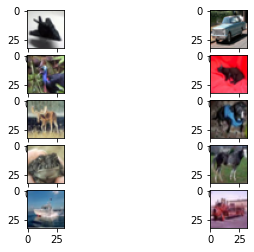

In [2]:
# load data
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
samples = [29, 32, 24, 21, 28, 27, 25, 37, 62, 67]
# plot image of each class
plt.figure(0)
for i in range(5):
    for j in range(2):
        plt.subplot2grid((5, 2), (i, j))
        plt.imshow(train_data[samples[2 * i + j]])
plt.show()
train_data, valid_data, train_label, valid_label = train_test_split(train_data, train_label, test_size=0.2, random_state=42)


In [3]:
# RGB to Grayscale
grey_train = tf.image.rgb_to_grayscale(train_data)
grey_valid = tf.image.rgb_to_grayscale(valid_data)
grey_test = tf.image.rgb_to_grayscale(test_data)

In [4]:
# Reshaping to 1*1024
grey_train=np.squeeze(np.array(grey_train)).reshape(40000,32*32)
grey_valid=np.squeeze(np.array(grey_valid)).reshape(10000,32*32)
grey_test=np.squeeze(np.array(grey_test)).reshape(10000,32*32)

In [5]:
# normalize data
train_data = np.array(grey_train) / 255.0
valid_data= np.array(grey_valid)/ 255.0
test_data = np.array(grey_test) / 255.0

In [6]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(40000, 1024)
(10000, 1024)
(10000, 1024)


In [7]:
# one hot encoding
train_label = tf.keras.utils.to_categorical(train_label,10)
test_label = tf.keras.utils.to_categorical(test_label,10)
valid_label = tf.keras.utils.to_categorical(valid_label,10)

In [11]:
# define our model
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(1024,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2,629,130
Trainable params: 2,629,130
Non-trainable params: 0
_________________________________________________________________


In [12]:
# training the model
start_time=time.time()
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=20,
                    validation_data=(valid_data, valid_label), batch_size=64)
stop_time=time.time()
print("\n training time:",stop_time-start_time)

Epoch 1/20
625/625 [==============================] - 5s 7ms/step - loss: 1.9889 - accuracy: 0.2828 - val_loss: 1.8860 - val_accuracy: 0.3345
Epoch 2/20
625/625 [==============================] - 4s 7ms/step - loss: 1.8430 - accuracy: 0.3382 - val_loss: 1.8466 - val_accuracy: 0.3422
Epoch 3/20
625/625 [==============================] - 4s 7ms/step - loss: 1.7646 - accuracy: 0.3705 - val_loss: 1.8214 - val_accuracy: 0.3457
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 1.7088 - accuracy: 0.3893 - val_loss: 1.8034 - val_accuracy: 0.3624
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 1.6655 - accuracy: 0.4072 - val_loss: 1.7318 - val_accuracy: 0.3928
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 1.6205 - accuracy: 0.4216 - val_loss: 1.6723 - val_accuracy: 0.4074
Epoch 7/20
625/625 [==============================] - 4s 6ms/step - loss: 1.5859 - accuracy: 0.4339 - val_loss: 1.6566 - val_accuracy: 0.4241
Epoch 

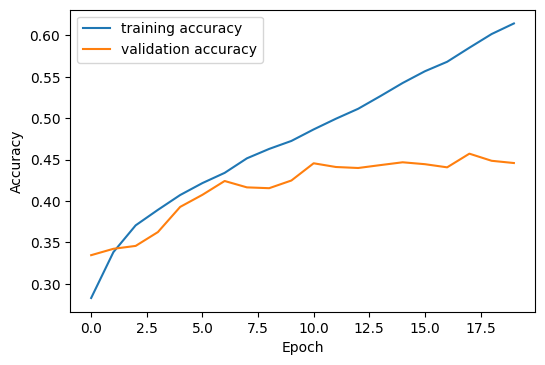

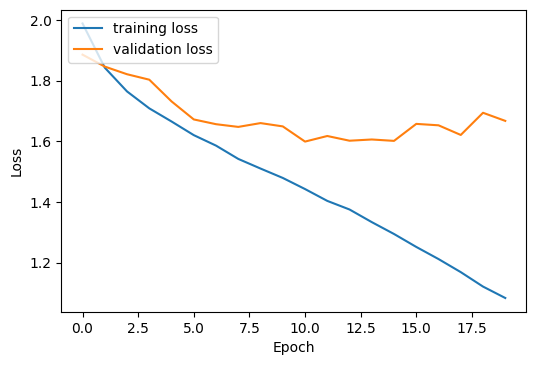

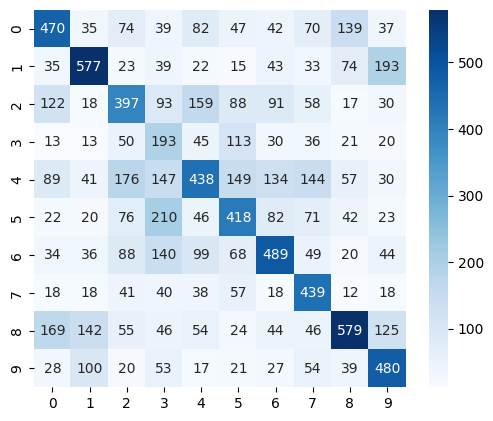

313/313 - 1s - loss: 1.6679 - accuracy: 0.4480 - 1s/epoch - 4ms/step
1250/1250 - 6s - loss: 1.0119 - accuracy: 0.6436 - 6s/epoch - 5ms/step
accuracy on test data: 0.4480000138282776
loss on test data: 1.6679002046585083
f1_score on test data: 0.4457510260697205
recall on test data: 0.448
presicion on test data: 0.4567942244104739


In [13]:
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(6, 4), dpi=100)
plt.plot(fit_history.history['loss'], label='training loss')
plt.plot(fit_history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(6, 5), dpi=100)
z=model.predict(test_data)
pred=np.argmax(z,axis=1)
y_label=np.argmax(test_label,axis=1)
cm = confusion_matrix(pred, y_label)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")
plt.show()

# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
precision = precision_score(y_label,pred,average='weighted')
recall = recall_score(y_label,pred,average='weighted')
f1 = f1_score(y_label,pred,average='weighted')
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("f1_score on test data:",f1)
print("recall on test data:",recall)
print("presicion on test data:",precision)
#print("accuracy on train data:",train_acc)
#print("loss on train data:",train_loss)

# **PART B: Batch Size**

In [14]:
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(1024,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_9 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 2,629,130
Trainable params: 2,629,130
Non-trainable params: 0
_________________________________________________________________


In [15]:
# training the model
# change batch size
batch = 512
start_time=time.time()
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=20,
                    validation_data=(valid_data, valid_label), batch_size=batch)
stop_time=time.time()
print("\n training time:",stop_time-start_time)

Epoch 1/20
79/79 [==============================] - 2s 15ms/step - loss: 2.1206 - accuracy: 0.2306 - val_loss: 2.0195 - val_accuracy: 0.2748
Epoch 2/20
79/79 [==============================] - 1s 13ms/step - loss: 1.9758 - accuracy: 0.3002 - val_loss: 1.9677 - val_accuracy: 0.2984
Epoch 3/20
79/79 [==============================] - 1s 13ms/step - loss: 1.9159 - accuracy: 0.3232 - val_loss: 1.9162 - val_accuracy: 0.3205
Epoch 4/20
79/79 [==============================] - 1s 13ms/step - loss: 1.8555 - accuracy: 0.3438 - val_loss: 1.8608 - val_accuracy: 0.3461
Epoch 5/20
79/79 [==============================] - 1s 13ms/step - loss: 1.8130 - accuracy: 0.3596 - val_loss: 1.8264 - val_accuracy: 0.3590
Epoch 6/20
79/79 [==============================] - 1s 13ms/step - loss: 1.7731 - accuracy: 0.3749 - val_loss: 1.8069 - val_accuracy: 0.3680
Epoch 7/20
79/79 [==============================] - 1s 14ms/step - loss: 1.7455 - accuracy: 0.3851 - val_loss: 1.8224 - val_accuracy: 0.3539
Epoch 8/20
79

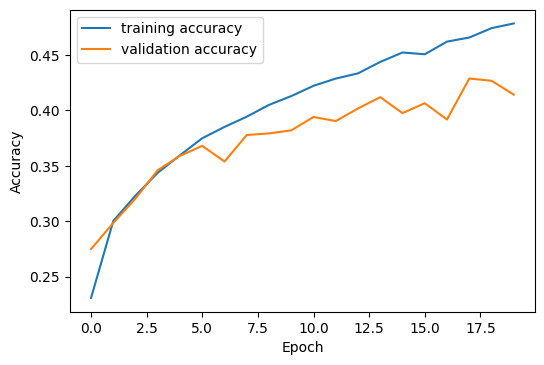

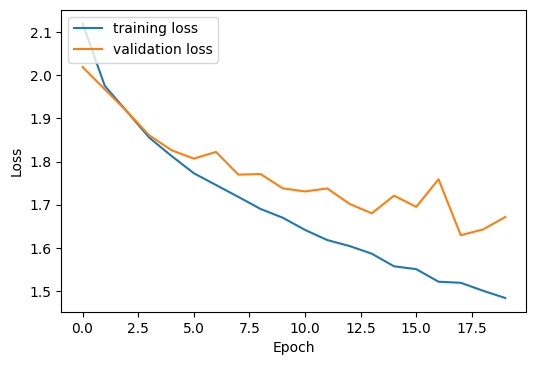

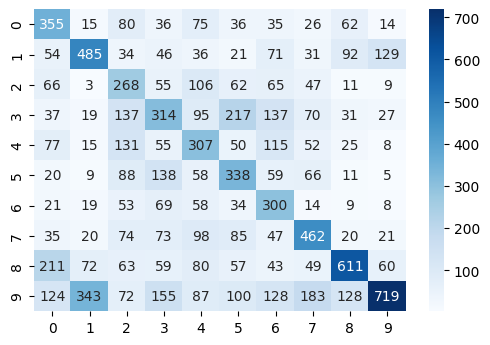

313/313 - 1s - loss: 1.6565 - accuracy: 0.4159 - 928ms/epoch - 3ms/step
1250/1250 - 4s - loss: 1.4917 - accuracy: 0.4782 - 4s/epoch - 3ms/step
accuracy on test data: 0.41589999198913574
loss on test data: 1.6564687490463257
f1_score on test data: 0.4084068096955626
recall on test data: 0.4159
presicion on test data: 0.42682814215522213


In [16]:
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(6, 4), dpi=100)
plt.plot(fit_history.history['loss'], label='training loss')
plt.plot(fit_history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0, 2])
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(6, 4), dpi=100)
z=model.predict(test_data)
pred=np.argmax(z,axis=1)
y_label=np.argmax(test_label,axis=1)
cm = confusion_matrix(pred, y_label)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot(cmap=plt.cm.Blues)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")
plt.show()

# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
precision = precision_score(y_label,pred,average='weighted')
recall = recall_score(y_label,pred,average='weighted')
f1 = f1_score(y_label,pred,average='weighted')
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("f1_score on test data:",f1)
print("recall on test data:",recall)
print("presicion on test data:",precision)
#print("accuracy on train data:",train_acc)
#print("loss on train data:",train_loss)

# **PART C: Activation Functions**

In [20]:
model = models.Sequential()
# change activation function to see different parts
activation = "relu"
model.add(layers.Dense(1024, activation = activation, input_shape=(1024,)))
model.add(layers.Dense(1024, activation = activation))
model.add(layers.Dense(512, activation = activation))
model.add(layers.Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_17 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_18 (Dense)            (None, 512)               524800    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 2,629,130
Trainable params: 2,629,130
Non-trainable params: 0
_________________________________________________________________


In [21]:
# training the model
batch_size = 128
start_time=time.time()
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=20,
                    validation_data=(valid_data, valid_label), batch_size=batch_size)
stop_time=time.time()
print("\n training time:",stop_time-start_time)

Epoch 1/20
313/313 [==============================] - 3s 8ms/step - loss: 2.0167 - accuracy: 0.2735 - val_loss: 1.8955 - val_accuracy: 0.3285
Epoch 2/20
313/313 [==============================] - 2s 7ms/step - loss: 1.8475 - accuracy: 0.3416 - val_loss: 1.8498 - val_accuracy: 0.3463
Epoch 3/20
313/313 [==============================] - 2s 7ms/step - loss: 1.7759 - accuracy: 0.3677 - val_loss: 1.7827 - val_accuracy: 0.3736
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 1.7241 - accuracy: 0.3889 - val_loss: 1.7624 - val_accuracy: 0.3772
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6710 - accuracy: 0.4064 - val_loss: 1.7333 - val_accuracy: 0.3909
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6359 - accuracy: 0.4212 - val_loss: 1.7195 - val_accuracy: 0.3951
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 1.5946 - accuracy: 0.4350 - val_loss: 1.7047 - val_accuracy: 0.3944
Epoch 

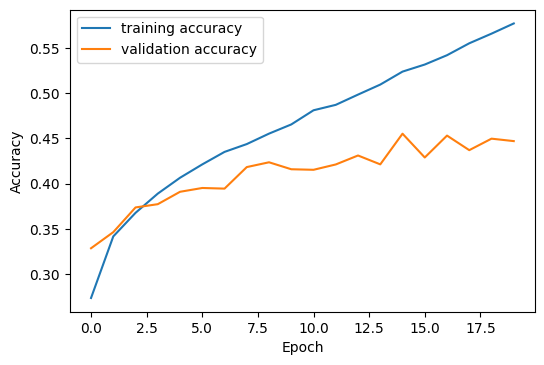

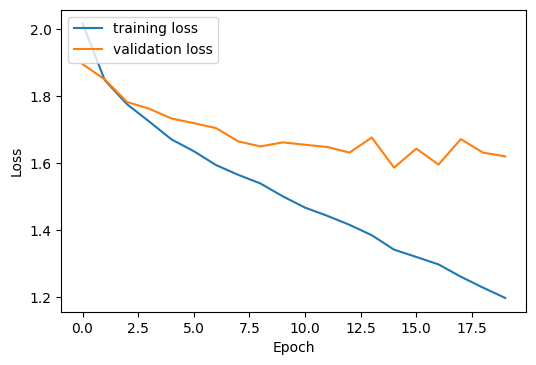

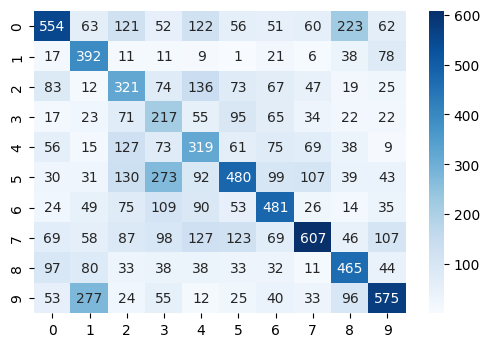

313/313 - 1s - loss: 1.6204 - accuracy: 0.4411 - 959ms/epoch - 3ms/step
1250/1250 - 4s - loss: 1.1372 - accuracy: 0.5984 - 4s/epoch - 3ms/step
accuracy on test data: 0.44110000133514404
loss on test data: 1.6204134225845337
f1_score on test data: 0.43582769697303403
recall on test data: 0.4411
presicion on test data: 0.4499364852290206


In [22]:
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(6, 4), dpi=100)
plt.plot(fit_history.history['loss'], label='training loss')
plt.plot(fit_history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0, 2])
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(6, 4), dpi=100)
z=model.predict(test_data)
pred=np.argmax(z,axis=1)
y_label=np.argmax(test_label,axis=1)
cm = confusion_matrix(pred, y_label)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot(cmap=plt.cm.Blues)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")
plt.show()

# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
precision = precision_score(y_label,pred,average='weighted')
recall = recall_score(y_label,pred,average='weighted')
f1 = f1_score(y_label,pred,average='weighted')
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("f1_score on test data:",f1)
print("recall on test data:",recall)
print("presicion on test data:",precision)

# **PART D: Loss Function**

In [30]:
model = models.Sequential()
activation = "relu"
model.add(layers.Dense(1024, activation = "relu", input_shape=(1024,)))
model.add(layers.Dense(1024, activation = "relu"))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_29 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_30 (Dense)            (None, 512)               524800    
                                                                 
 dense_31 (Dense)            (None, 10)                5130      
                                                                 
Total params: 2,629,130
Trainable params: 2,629,130
Non-trainable params: 0
_________________________________________________________________


In [31]:
# training the model
batch_size = 128
start_time=time.time()
opt = SGD(learning_rate=0.01, momentum=0.9)
loss_func = "categorical_crossentropy"
# loss_func = kullback_leibler_divergence
# loss_func = poisson
model.compile(optimizer=opt,
              loss= loss_func,
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=20,
                    validation_data=(valid_data, valid_label), batch_size=batch_size)
stop_time=time.time()
print("\n training time:",stop_time-start_time)

Epoch 1/20
313/313 [==============================] - 4s 10ms/step - loss: 2.0175 - accuracy: 0.2706 - val_loss: 1.9143 - val_accuracy: 0.3234
Epoch 2/20
313/313 [==============================] - 2s 7ms/step - loss: 1.8473 - accuracy: 0.3436 - val_loss: 1.8204 - val_accuracy: 0.3522
Epoch 3/20
313/313 [==============================] - 2s 7ms/step - loss: 1.7740 - accuracy: 0.3699 - val_loss: 1.7741 - val_accuracy: 0.3774
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 1.7208 - accuracy: 0.3875 - val_loss: 1.7441 - val_accuracy: 0.3827
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6775 - accuracy: 0.4055 - val_loss: 1.7226 - val_accuracy: 0.3809
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6341 - accuracy: 0.4223 - val_loss: 1.7034 - val_accuracy: 0.3936
Epoch 7/20
313/313 [==============================] - 3s 9ms/step - loss: 1.6049 - accuracy: 0.4340 - val_loss: 1.6565 - val_accuracy: 0.4186
Epoch

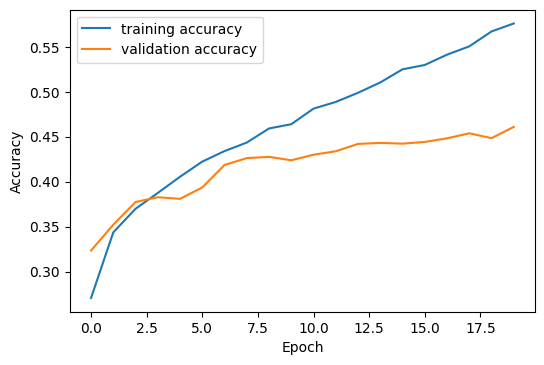

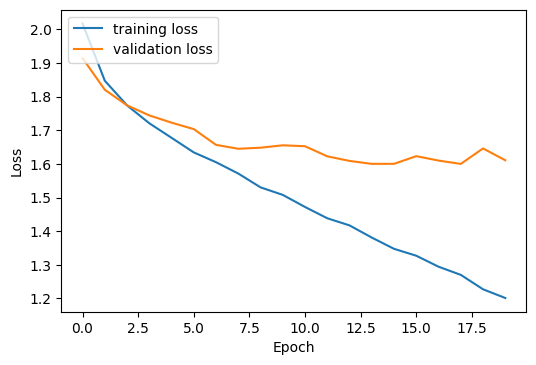

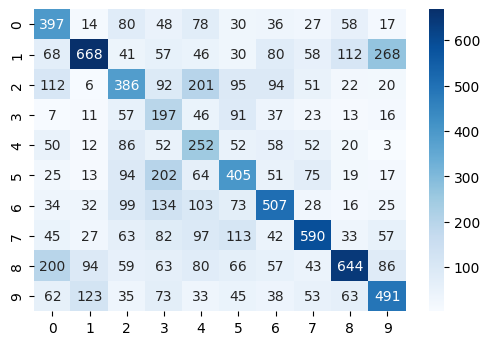

313/313 - 1s - loss: 1.5993 - accuracy: 0.4537 - 933ms/epoch - 3ms/step
1250/1250 - 4s - loss: 1.1359 - accuracy: 0.6018 - 4s/epoch - 3ms/step
accuracy on test data: 0.4537000060081482
loss on test data: 1.5992519855499268
f1_score on test data: 0.4418559074498811
recall on test data: 0.4537
presicion on test data: 0.44839331923639403


In [32]:
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(6, 4), dpi=100)
plt.plot(fit_history.history['loss'], label='training loss')
plt.plot(fit_history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0, 2])
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(6, 4), dpi=100)
z=model.predict(test_data)
pred=np.argmax(z,axis=1)
y_label=np.argmax(test_label,axis=1)
cm = confusion_matrix(pred, y_label)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot(cmap=plt.cm.Blues)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")
plt.show()

# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
precision = precision_score(y_label,pred,average='weighted')
recall = recall_score(y_label,pred,average='weighted')
f1 = f1_score(y_label,pred,average='weighted')
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("f1_score on test data:",f1)
print("recall on test data:",recall)
print("presicion on test data:",precision)

# **PART E: Optimization Function**

In [33]:
model = models.Sequential()
activation = "relu"
model.add(layers.Dense(1024, activation = "relu", input_shape=(1024,)))
model.add(layers.Dense(1024, activation = "relu"))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_33 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_34 (Dense)            (None, 512)               524800    
                                                                 
 dense_35 (Dense)            (None, 10)                5130      
                                                                 
Total params: 2,629,130
Trainable params: 2,629,130
Non-trainable params: 0
_________________________________________________________________


In [34]:
# training the model
batch_size = 128
start_time=time.time()
opt = SGD(learning_rate=0.01, momentum=0.9)
#opt = "RMSprop"
#opt = "adam"
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=20,
                    validation_data=(valid_data, valid_label), batch_size=batch_size)
stop_time=time.time()
print("\n training time:",stop_time-start_time)

Epoch 1/20
313/313 [==============================] - 3s 8ms/step - loss: 2.0188 - accuracy: 0.2740 - val_loss: 1.9254 - val_accuracy: 0.3201
Epoch 2/20
313/313 [==============================] - 2s 7ms/step - loss: 1.8564 - accuracy: 0.3385 - val_loss: 1.8810 - val_accuracy: 0.3371
Epoch 3/20
313/313 [==============================] - 2s 7ms/step - loss: 1.7757 - accuracy: 0.3705 - val_loss: 1.7920 - val_accuracy: 0.3651
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 1.7182 - accuracy: 0.3870 - val_loss: 1.7790 - val_accuracy: 0.3672
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6797 - accuracy: 0.4009 - val_loss: 1.7774 - val_accuracy: 0.3589
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6443 - accuracy: 0.4146 - val_loss: 1.7146 - val_accuracy: 0.3956
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6012 - accuracy: 0.4345 - val_loss: 1.7794 - val_accuracy: 0.3815
Epoch 

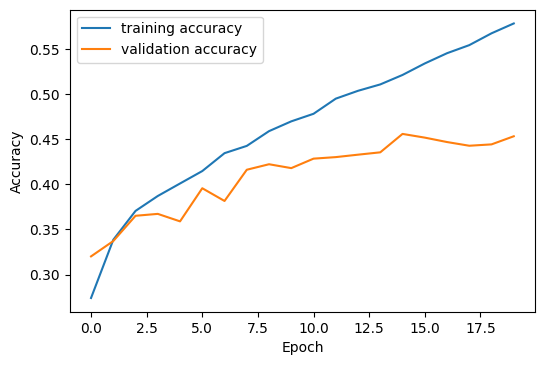

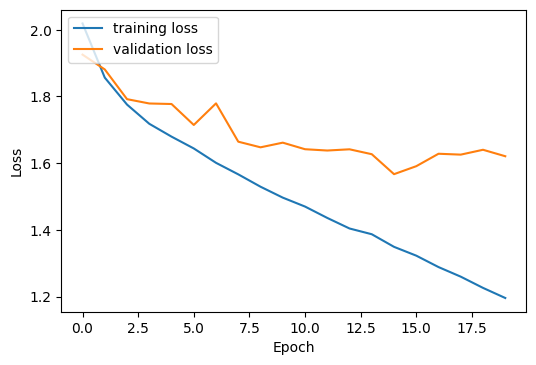

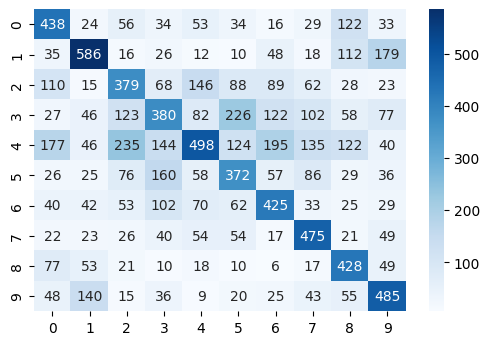

313/313 - 1s - loss: 1.6056 - accuracy: 0.4466 - 941ms/epoch - 3ms/step
1250/1250 - 4s - loss: 1.1318 - accuracy: 0.6103 - 4s/epoch - 3ms/step
accuracy on test data: 0.4465999901294708
loss on test data: 1.6056127548217773
f1_score on test data: 0.45289860006545696
recall on test data: 0.4466
presicion on test data: 0.47239501783273224


In [35]:
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(6, 4), dpi=100)
plt.plot(fit_history.history['loss'], label='training loss')
plt.plot(fit_history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0, 2])
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(6, 4), dpi=100)
z=model.predict(test_data)
pred=np.argmax(z,axis=1)
y_label=np.argmax(test_label,axis=1)
cm = confusion_matrix(pred, y_label)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot(cmap=plt.cm.Blues)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")
plt.show()

# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
precision = precision_score(y_label,pred,average='weighted')
recall = recall_score(y_label,pred,average='weighted')
f1 = f1_score(y_label,pred,average='weighted')
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("f1_score on test data:",f1)
print("recall on test data:",recall)
print("presicion on test data:",precision)

# Part F: Number of Hidden Layers

In [36]:
# uncomment to see changes
model = models.Sequential()
activation = "relu"
model.add(layers.Dense(1024, activation = "relu", input_shape=(1024,)))
model.add(layers.Dense(1024, activation = "relu"))
#model.add(layers.Dense(1024, activation = "relu"))
#model.add(layers.Dense(1024, activation = "relu"))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_37 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_38 (Dense)            (None, 512)               524800    
                                                                 
 dense_39 (Dense)            (None, 10)                5130      
                                                                 
Total params: 2,629,130
Trainable params: 2,629,130
Non-trainable params: 0
_________________________________________________________________


In [37]:
# training the model
batch_size = 128
start_time=time.time()
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=20,
                    validation_data=(valid_data, valid_label), batch_size=batch_size)
stop_time=time.time()
print("\n training time:",stop_time-start_time)

Epoch 1/20
313/313 [==============================] - 3s 8ms/step - loss: 2.0229 - accuracy: 0.2692 - val_loss: 1.9255 - val_accuracy: 0.3148
Epoch 2/20
313/313 [==============================] - 2s 7ms/step - loss: 1.8472 - accuracy: 0.3439 - val_loss: 1.8421 - val_accuracy: 0.3457
Epoch 3/20
313/313 [==============================] - 2s 7ms/step - loss: 1.7825 - accuracy: 0.3665 - val_loss: 1.7836 - val_accuracy: 0.3673
Epoch 4/20
313/313 [==============================] - 3s 9ms/step - loss: 1.7170 - accuracy: 0.3916 - val_loss: 1.7761 - val_accuracy: 0.3677
Epoch 5/20
313/313 [==============================] - 3s 10ms/step - loss: 1.6742 - accuracy: 0.4040 - val_loss: 1.7024 - val_accuracy: 0.3994
Epoch 6/20
313/313 [==============================] - 3s 10ms/step - loss: 1.6356 - accuracy: 0.4200 - val_loss: 1.7338 - val_accuracy: 0.3954
Epoch 7/20
313/313 [==============================] - 3s 10ms/step - loss: 1.5985 - accuracy: 0.4342 - val_loss: 1.6617 - val_accuracy: 0.4122
Epo

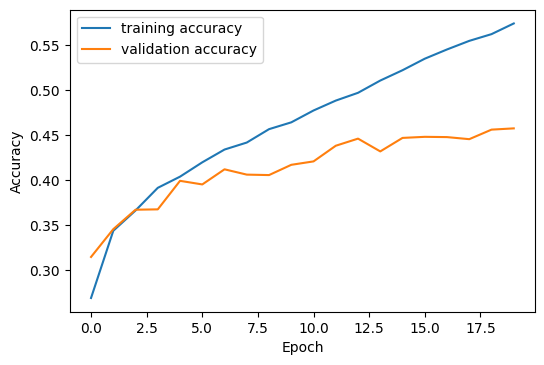

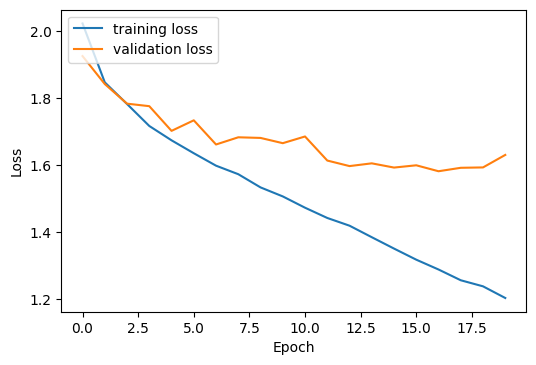

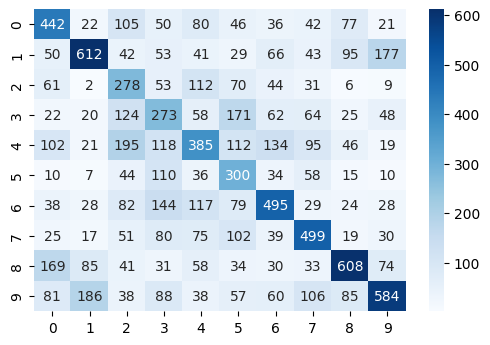

313/313 - 1s - loss: 1.6034 - accuracy: 0.4476 - 1s/epoch - 4ms/step
1250/1250 - 5s - loss: 1.1259 - accuracy: 0.6029 - 5s/epoch - 4ms/step
accuracy on test data: 0.44760000705718994
loss on test data: 1.6033574342727661
f1_score on test data: 0.44157819989658675
recall on test data: 0.4476
presicion on test data: 0.44753577955038726


In [38]:
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(6, 4), dpi=100)
plt.plot(fit_history.history['loss'], label='training loss')
plt.plot(fit_history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0, 2])
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(6, 4), dpi=100)
z=model.predict(test_data)
pred=np.argmax(z,axis=1)
y_label=np.argmax(test_label,axis=1)
cm = confusion_matrix(pred, y_label)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot(cmap=plt.cm.Blues)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")
plt.show()

# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
precision = precision_score(y_label,pred,average='weighted')
recall = recall_score(y_label,pred,average='weighted')
f1 = f1_score(y_label,pred,average='weighted')
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("f1_score on test data:",f1)
print("recall on test data:",recall)
print("presicion on test data:",precision)